# Import Library

In [552]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [553]:
df = pd.read_csv('dataset/bank.csv')

# EDA

In [554]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [555]:
kategorikal = df.select_dtypes(exclude='number').columns
numerikal = df.select_dtypes(include='number').columns

In [556]:
df[df.job == 'admin.']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
18,41,admin.,married,secondary,no,55,yes,no,unknown,8,may,1120,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,45,admin.,married,secondary,no,25,yes,no,unknown,28,may,82,4,-1,0,unknown,no
11113,43,admin.,married,secondary,no,616,yes,no,unknown,9,may,168,2,-1,0,unknown,no
11142,52,admin.,divorced,secondary,no,48,no,yes,cellular,17,nov,591,1,-1,0,unknown,no
11146,30,admin.,married,secondary,yes,23,no,yes,cellular,4,feb,149,2,-1,0,unknown,no


In [557]:
df.job.value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [558]:
df.deposit.value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [559]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [560]:
df.duplicated().sum()

np.int64(0)

In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


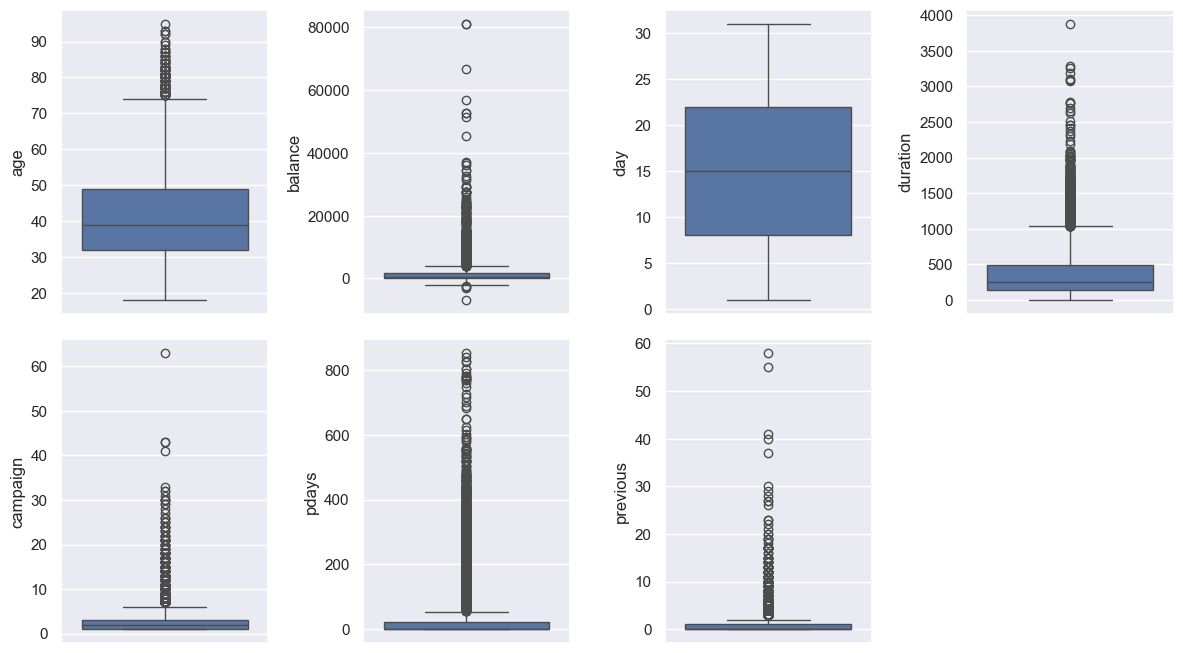

In [562]:
plt.figure(figsize=(12,10))

for i, col in enumerate(numerikal):
    plt.subplot(3, 4, i+1)
    sns.boxplot(df[col])

plt.tight_layout()

In [563]:
q1 = np.percentile(df['pdays'], 25)
q3 = np.percentile(df['pdays'], 75)
IQR = q3-q1
upper = q3 + IQR*1.5
under = q1 - IQR*1.5
df[df['pdays'] == -1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no


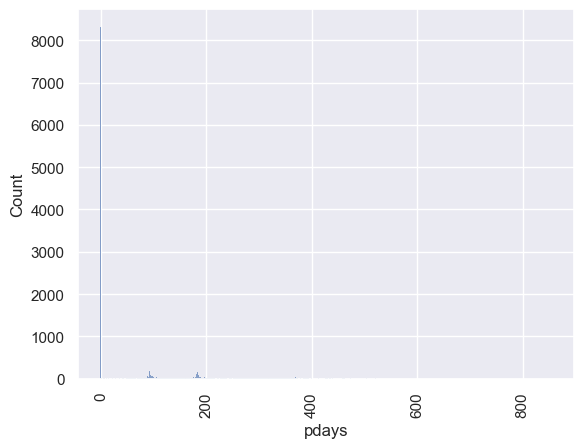

In [564]:
sns.histplot(data=df, x='pdays', log_scale=(False, False))  # log di sumbu Y
plt.xticks(rotation=90)
plt.show()


In [565]:
print(df['pdays'].min())
print(df['pdays'].max())


-1
854


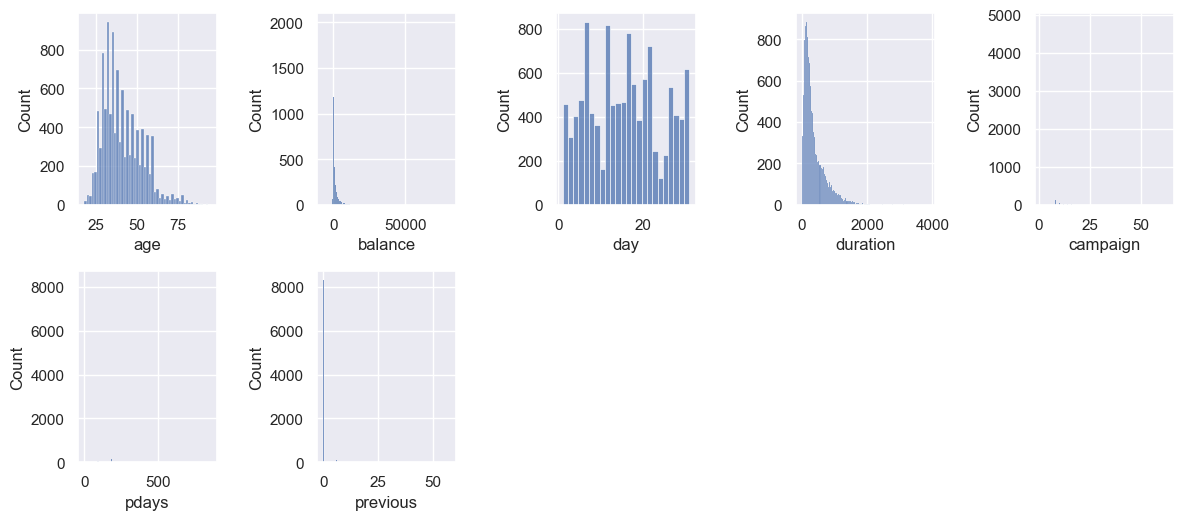

In [566]:
plt.figure(figsize=(12,10))

for i, col in enumerate(numerikal):
    plt.subplot(4, 5, i+1)
    sns.histplot(df[col])

plt.tight_layout()
plt.show()

In [567]:
import numpy as np

df['balance'] = np.log1p(df['balance'])
df['duration'] = np.log1p(df['duration'])
df['campaign'] = np.log1p(df['campaign'])
df['pdays'] = np.log1p(df['pdays'])  # jika pdays >= 0
df['previous'] = np.log1p(df['previous'])

c:\Users\SKOMDA RPS-04\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\SKOMDA RPS-04\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


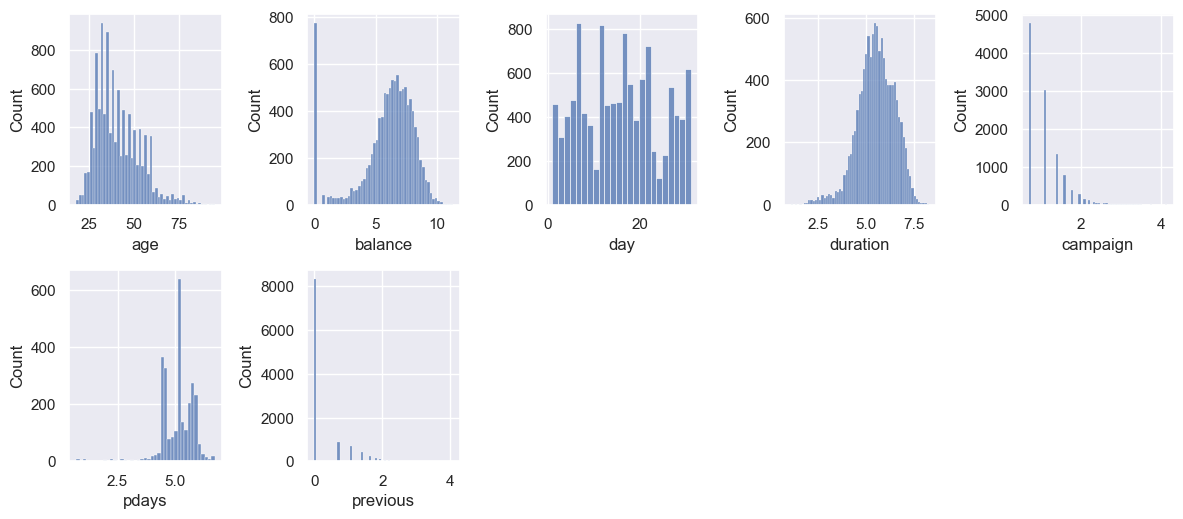

In [568]:
plt.figure(figsize=(12,10))

for i, col in enumerate(numerikal):
    plt.subplot(4, 5, i+1)
    sns.histplot(df[col])

plt.tight_layout()
plt.show()

In [569]:
# for col in numerikal:
#     q1 = np.percentile(df[col], 25)
#     q3 = np.percentile(df[col], 75)
#     IQR = q3-q1
#     upper = q3 + IQR*1.5
#     under = q1 - IQR*1.5
#     df[col] = df[col].clip(upper=upper, lower=under)

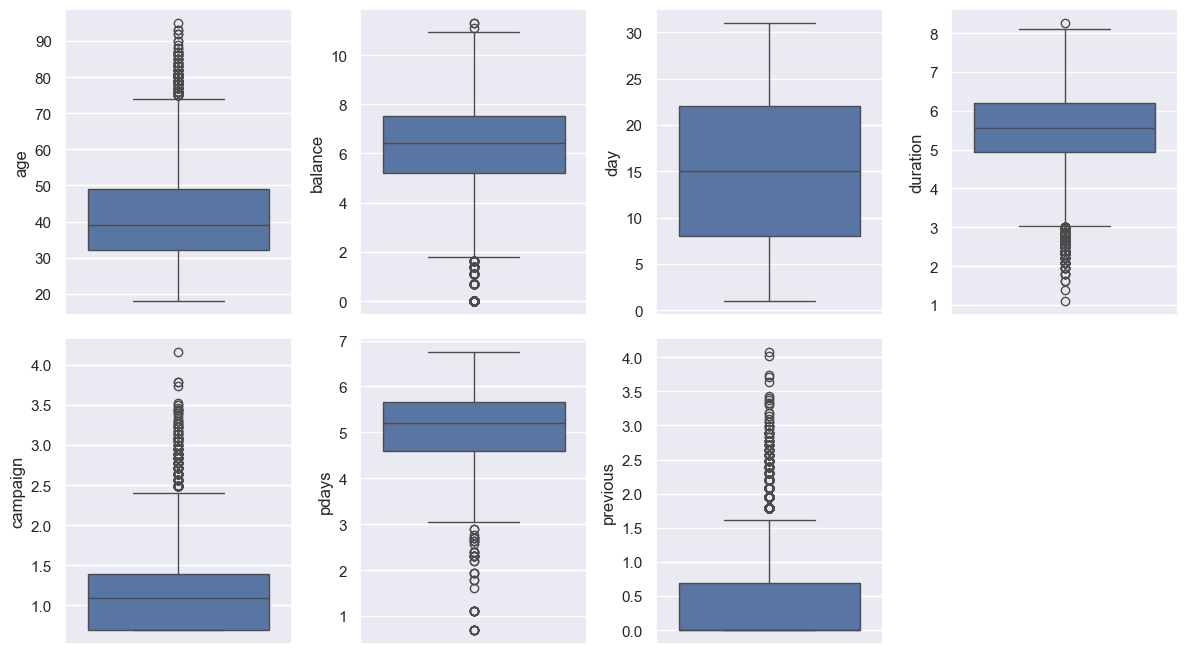

In [570]:
plt.figure(figsize=(12,10))

for i, col in enumerate(numerikal):
    plt.subplot(3, 4, i+1)
    sns.boxplot(df[col])

plt.tight_layout()

<Axes: >

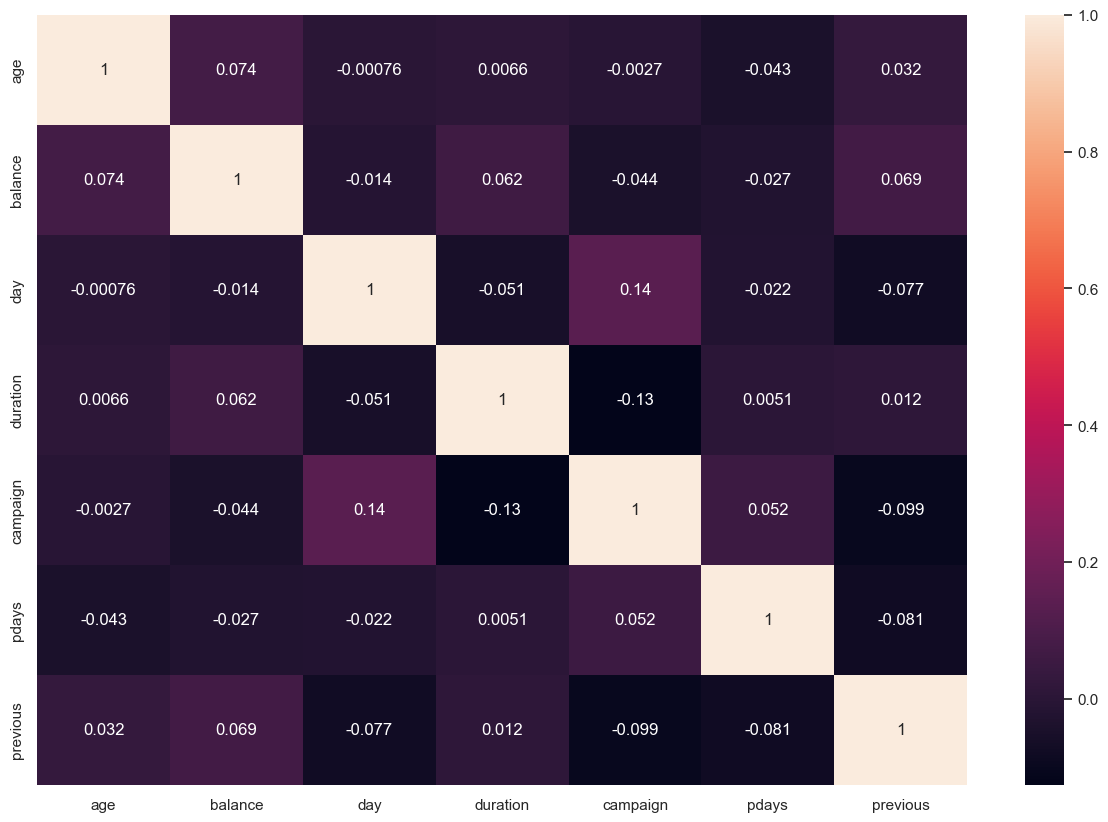

In [571]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numerikal].corr(), annot=True)

# Preprocessing

In [572]:
# label encoder

class LabelEncoder:
    def __init__(self):
        self.encode = {}
        self.decode = {}
    
    def fit(self, data):
        unique = sorted(set(data))
        self.encode = {label: index for index, label in enumerate(unique)}
        self.decode = {index: label for label, index in self.encode.items()}
    
    def transform(self, data):
        return [self.encode[label] for label in data]
    
    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)
    
    def inverse_transform(self, encode_value):
        return [self.decode[label] for label in encode_value]

In [573]:
for col in kategorikal:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

<Axes: >

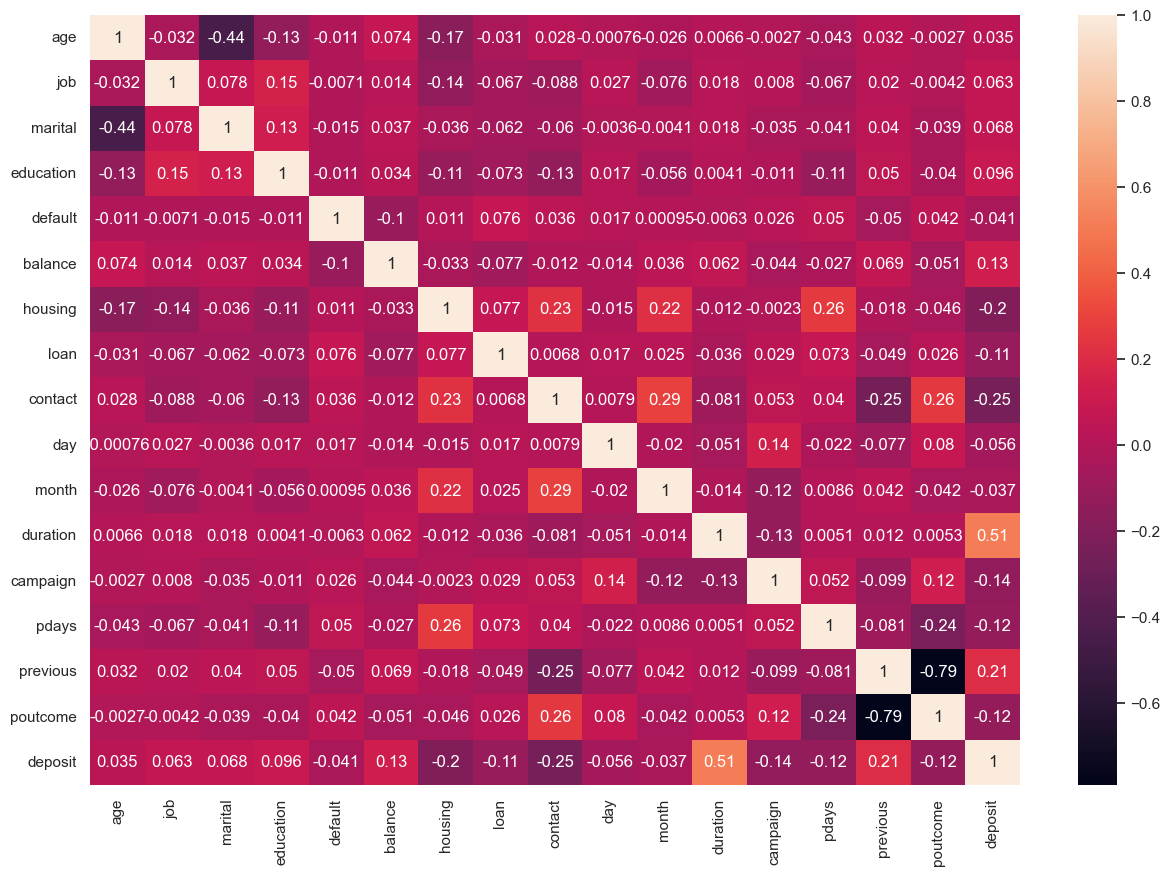

In [574]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [575]:
X = df.drop('deposit', axis=1)
y = df.deposit

In [576]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [577]:
# feature scalling

def standart_scaler(X):
     x = np.array(X)
     mean = np.mean(x)
     std = np.std(x)
     scaled = (x - mean) / std
     return scaled

In [578]:
X = X.apply(standart_scaler)

c:\Users\SKOMDA RPS-04\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\SKOMDA RPS-04\AppData\Local\Temp\ipykernel_85832\4189711603.py:7: RuntimeWarning: invalid value encountered in subtract
  scaled = (x - mean) / std


In [579]:
print(X.shape)
print(y.shape)

(11162, 16)
(11162,)


In [580]:
#traintestsplit

def train_test_split(X, y, test_size, random_state):
    if random_state is not None:
        np.random.seed(random_state)
    
    jumlah_data = X.shape[0]
    indices = np.random.permutation(jumlah_data)
    split = int(jumlah_data * (1 - test_size))

    X_train = X.iloc[indices[:split]]
    X_test = X.iloc[indices[split:]]
    y_train = y.iloc[indices[:split]]
    y_test = y.iloc[indices[split:]]
    return X_train, X_test, y_train, y_test

In [581]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [582]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8929, 16)
(2233, 16)
(8929,)
(2233,)


In [583]:
y_test

8569     0
6979     0
1827     1
10799    0
2376     1
        ..
5734     0
5191     1
5390     0
860      1
7270     0
Name: deposit, Length: 2233, dtype: int64

# Modeling

In [584]:
class KNN:
        def __init__(self, k, weight):
            self.k = k
            self.weight = weight
        
        def fit(self, X_train, y_train):
            self.X_train = np.array(X_train)
            self.y_train = np.array(y_train)
        
        def euclidean_distance(self, a, b):
            return np.sqrt(np.sum((np.array(a) - np.array(b))**2))

        def get_n(self, test_point):
            distance = []
            for x, y in zip(self.X_train, self.y_train):
                dist = self.euclidean_distance(x, test_point)
                distance.append((dist, y))
            
            distance.sort(key=lambda x: x[0])
            return distance[:self.k]
        
        def predict(self, X_test):
            X_test = np.array(X_test)
            prediction = []
            for point in X_test:
                neighbors = self.get_n(point)

                if self.weight == 'uniform':
                    label = [label for _, label in neighbors]
                    pred = max(set(label), key=label.count)
                
                elif self.weight == 'distance':
                    weight_label = {}
                    for dist, label in neighbors:
                        weight = 1 / (dist + 1e-5)
                        if label in weight_label:
                            weight_label[label] += weight
                        else:
                            weight_label[label] = weight
                        pred = max(weight_label.items(), key= lambda x: x[1])[0]
                prediction.append(pred)
            return prediction


        def score(self, X_test, y_test):
            y_pred = self.predict(X_test)
            accuracy = np.sum(y_pred == y_test) / len(y_test)*100
            return accuracy

In [585]:
import numpy as np

class KNN_Vectorized:
    def __init__(self, k=3, weight='uniform'):
        self.k = k
        self.weight = weight

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = []

        for point in X_test:
            # Hitung semua jarak ke X_train sekaligus
            distances = np.linalg.norm(self.X_train - point, axis=1)

            # Ambil indeks k jarak terkecil
            k_idx = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_idx]
            k_distances = distances[k_idx]

            if self.weight == 'uniform':
                # Voting mayoritas
                values, counts = np.unique(k_labels, return_counts=True)
                pred = values[np.argmax(counts)]
            
            elif self.weight == 'distance':
                # Voting dengan pembobotan
                weight_label = {}
                for dist, label in zip(k_distances, k_labels):
                    weight = 1 / (dist + 1e-5)
                    weight_label[label] = weight_label.get(label, 0) + weight
                pred = max(weight_label.items(), key=lambda x: x[1])[0]

            predictions.append(pred)

        return np.array(predictions)

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test) * 100
        return accuracy


In [586]:
class CustomKNNClassifier:
    def __init__(self, k, weight):
        self.k = k
        self.weight = weight

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        prediction = []
        for x in X_test:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))  # Euclidean distance
            nearest_neighbors = np.argsort(distances)[:self.k]  # Indices of k nearest neighbors
            nearest_labels = self.y_train[nearest_neighbors]  # Labels of k nearest neighbors

            if self.weight == 'uniform':
                unique_labels, counts = np.unique(nearest_labels, return_counts=True)
                pred = unique_labels[np.argmax(counts)]
            
            elif self.weight == 'distance':
                nearest_distance = distances[nearest_neighbors]
                weight_label = {}
                for dist, label in zip(nearest_distance, nearest_labels):
                    weight = 1 / (dist + 1e-5)
                    weight_label[label] = weight_label.get(label, 0) + weight
                pred = max(weight_label.items(), key=lambda x: x[1])[0]

            prediction.append(pred)
        return np.array(prediction)

    def score(self, X_test, y_test):
        X_test = np.array(X_test)
        y_pred = self.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test) * 100
        return accuracy

In [587]:
knnm = CustomKNNClassifier(k=21, weight='distance')
knnm.fit(X_train, y_train)
knnm.score(X_test, y_test)

np.float64(53.73936408419166)

In [588]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
5527,1.995163,0.158790,-1.917331,-0.380501,-0.123617,NaN,-0.947616,-0.387923,-0.598149,-1.265746,-0.139642,-0.326899,-0.862581,NaN,-0.522023,0.520705
4541,-0.271300,-1.081525,-0.318672,-0.380501,-0.123617,NaN,-0.947616,-0.387923,1.844786,0.040612,0.173661,1.743904,2.484347,NaN,-0.522023,0.520705
1964,-0.523129,-1.081525,1.279987,-0.380501,-0.123617,NaN,1.055280,-0.387923,-0.598149,-0.196908,0.800268,0.630788,-0.862581,NaN,0.598280,-2.470600
5007,0.484188,-1.081525,-0.318672,-0.380501,-0.123617,NaN,-0.947616,-0.387923,-0.598149,-0.909466,-1.392855,1.196906,-0.019391,NaN,-0.522023,0.520705
8928,-0.523129,1.399105,-0.318672,0.953822,-0.123617,NaN,1.055280,-0.387923,1.844786,-0.434427,0.800268,-1.129336,0.578862,NaN,-0.522023,0.520705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3747,0.652074,-0.151289,-1.917331,0.953822,-0.123617,NaN,-0.947616,-0.387923,-0.598149,0.634410,-0.139642,0.248025,-0.862581,NaN,-0.522023,0.520705
2196,-1.278616,-1.391604,1.279987,0.953822,-0.123617,NaN,-0.947616,2.577830,-0.598149,-1.622025,0.173661,-0.233943,-0.862581,NaN,1.253615,-0.476397
8561,-0.942844,-0.151289,1.279987,0.953822,-0.123617,NaN,1.055280,-0.387923,-0.598149,-0.909466,0.800268,-0.422639,-0.862581,NaN,0.598280,-1.473498
11029,-0.103413,-0.151289,-1.917331,0.953822,-0.123617,NaN,-0.947616,-0.387923,-0.598149,1.109449,-0.139642,0.375303,-0.862581,NaN,-0.522023,0.520705


In [589]:
knnv = KNN_Vectorized(k=21, weight='distance')
knnv.fit(X_train, y_train)
knnv.score(X_test, y_test)

np.float64(53.73936408419166)

In [590]:
# knn = KNN(k=21, weight='distance')
# knn.fit(X_train, y_train)
# knn.score(X_test, y_test)

In [593]:
def find_best_k(X_train, y_train, X_test, y_test, max_k=20, weights=['uniform', 'distance']):
    best_acc = 0
    best_k = None
    best_weight = None
    results = []

    for weight in weights:
        accuracies = []
        ks = list(range(1, max_k+1))

        print(f"\n Mencoba dengan weight = '{weight}'")
        for k in ks:
            model = KNN_Vectorized(k=k, weight=weight)
            model.fit(X_train, y_train)
            acc = model.score(X_test, y_test)
            accuracies.append(acc)
            print(f"  k = {k} → Akurasi: {acc:.2f}%")

            if acc > best_acc:
                best_acc = acc
                best_k = k
                best_weight = weight
        
        # Simpan hasil untuk plot
        results.append((weight, ks, accuracies))


    print(f"\n Nilai k terbaik adalah {best_k} dengan weight '{best_weight}' → Akurasi {best_acc:.2f}%")
    return best_k, best_weight


In [594]:
best_k, best_weight = find_best_k(X_train, y_train, X_test, y_test, max_k=21)


 Mencoba dengan weight = 'uniform'
  k = 1 → Akurasi: 53.74%
  k = 2 → Akurasi: 53.74%
  k = 3 → Akurasi: 46.26%
  k = 4 → Akurasi: 46.26%
  k = 5 → Akurasi: 46.26%
  k = 6 → Akurasi: 53.74%
  k = 7 → Akurasi: 53.74%
  k = 8 → Akurasi: 53.74%
  k = 9 → Akurasi: 53.74%
  k = 10 → Akurasi: 53.74%
  k = 11 → Akurasi: 53.74%
  k = 12 → Akurasi: 53.74%
  k = 13 → Akurasi: 53.74%
  k = 14 → Akurasi: 53.74%
  k = 15 → Akurasi: 53.74%
  k = 16 → Akurasi: 53.74%
  k = 17 → Akurasi: 53.74%
  k = 18 → Akurasi: 53.74%
  k = 19 → Akurasi: 53.74%
  k = 20 → Akurasi: 53.74%
  k = 21 → Akurasi: 53.74%

 Mencoba dengan weight = 'distance'
  k = 1 → Akurasi: 53.74%
  k = 2 → Akurasi: 53.74%
  k = 3 → Akurasi: 53.74%
  k = 4 → Akurasi: 53.74%
  k = 5 → Akurasi: 53.74%
  k = 6 → Akurasi: 53.74%
  k = 7 → Akurasi: 53.74%
  k = 8 → Akurasi: 53.74%
  k = 9 → Akurasi: 53.74%
  k = 10 → Akurasi: 53.74%
  k = 11 → Akurasi: 53.74%
  k = 12 → Akurasi: 53.74%
  k = 13 → Akurasi: 53.74%
  k = 14 → Akurasi: 53.74%


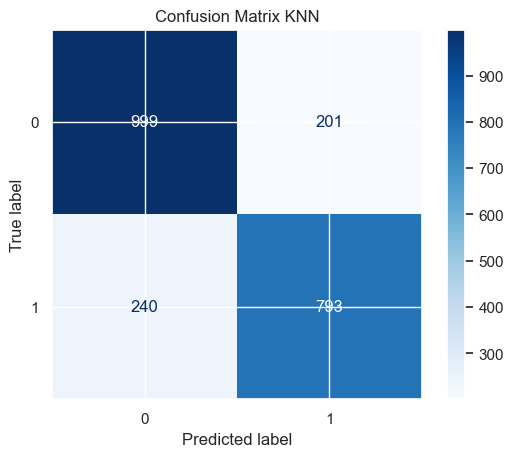

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = knnm.predict(np.array(X_test))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix KNN")
plt.show()
